In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel("sample.xlsx", list = 'data')

In [3]:
df.head()

,customer_month_salary,sum_credit_current,term_credit_current,form,sphere,type,EDUCATION,age,marital_status,time_at_work,GENDER,month_passport_issued,month_with_bank,CITY,target,ID
0,52350.25,500000,59,ООО,"Наука, Образование, Здравоохранение",вспомогательный персонал,высшее,44,холост / не замужем,68.0,мужской,124,67.0,Москва,1,1
1,115000.00,400000,60,Иная форма,Другое,специалист,высшее,30,холост / не замужем,96.0,мужской,107,68.0,Москва,1,2
2,87000.00,361000,60,ОАО,"Финансы, управляющие компании, банки, страхование",специалист,Высшее/Второе высшее/Ученая степень,28,женат / замужем,117.0,женский,2,72.0,Москва,1,3
3,145358.17,1499000,60,ЗАО,"Финансы, управляющие компании, банки, страхование",менеджер среднего звена,Высшее/Второе высшее/Ученая степень,30,женат / замужем,35.0,мужской,124,70.0,Москва,1,4
4,50000.00,365000,60,ООО,Другое,специалист,среднее-специальное,31,холост / не замужем,48.0,мужской,131,88.0,Москва,1,5


In [4]:
df.shape

(4771, 16)

In [5]:
where_are_NaNs = np.isnan(df.month_with_bank)
df.month_with_bank[where_are_NaNs] = 0

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [6]:
df = df.dropna()

In [7]:
df.shape

(4704, 16)

In [8]:
import seaborn as sns

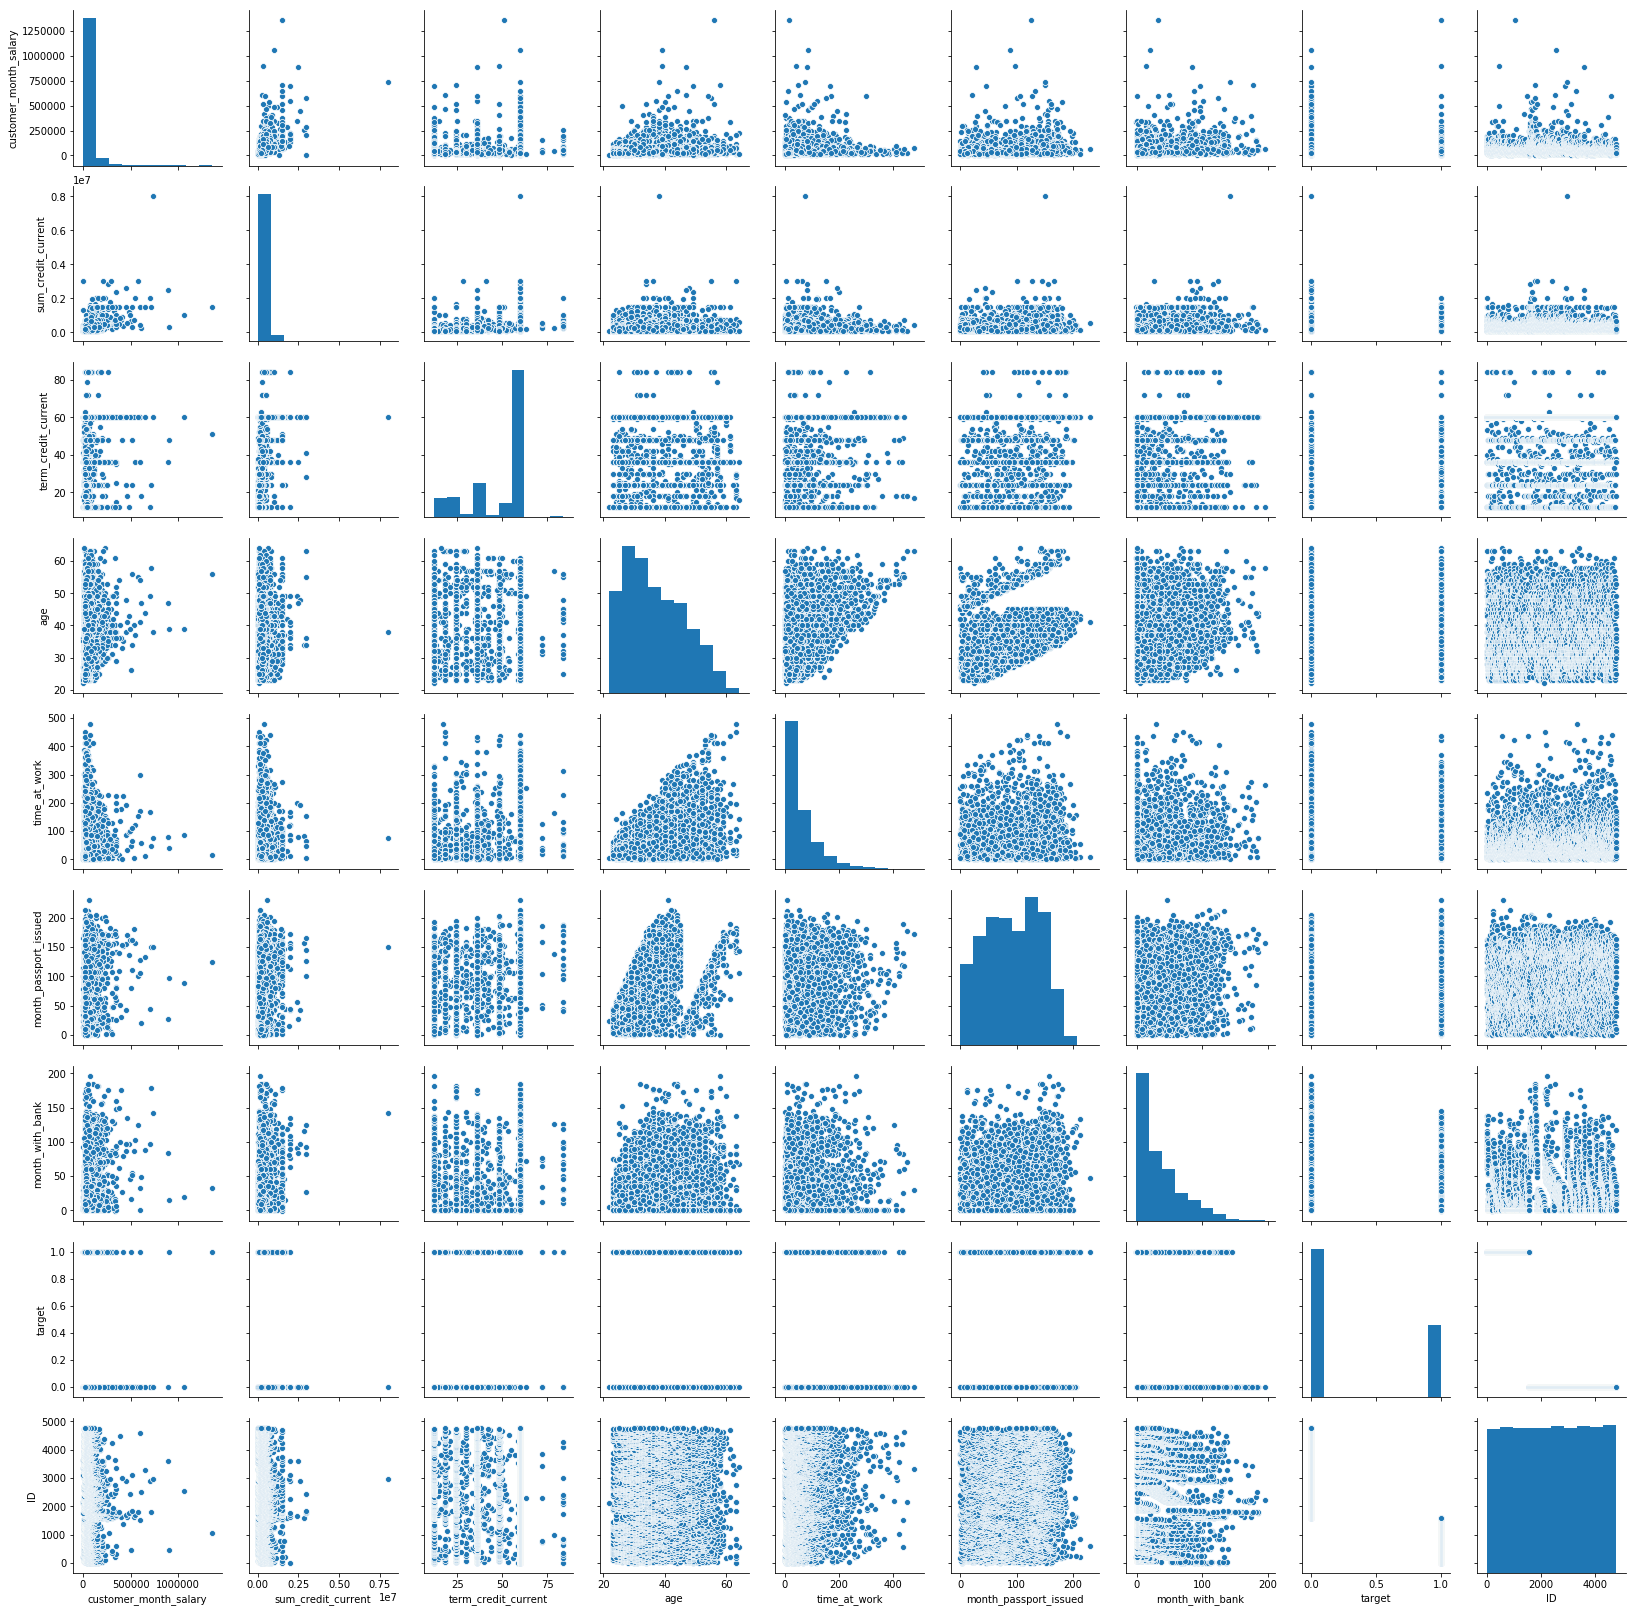

In [9]:
sns.pairplot(df)

In [10]:
df = df.drop("ID", axis=1)

In [21]:
def plot_new_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,4,figsize=(18,8))

    for feature in features:
        i += 1
        plt.subplot(2,4,i)
        sns.kdeplot(df1[feature], bw=0.5,label=label1)
        sns.kdeplot(df2[feature], bw=0.5,label=label2)
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major')
        plt.tick_params(axis='y', which='major')
    plt.show();

<Figure size 432x288 with 0 Axes>

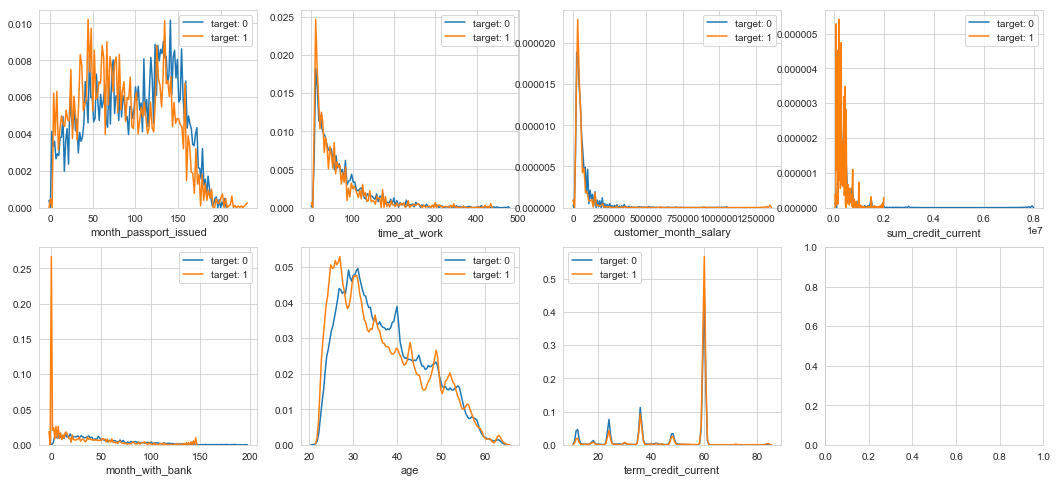

In [23]:
t0 = df.loc[df['target'] == 0]
t1 = df.loc[df['target'] == 1]
features = df[["month_passport_issued", "time_at_work", "customer_month_salary", "sum_credit_current", "month_with_bank", "age", "term_credit_current"]]
plot_new_feature_distribution(t0, t1, 'target: 0', 'target: 1', features)

In [24]:
correlations = df.corr()['target'].sort_values()

print('Most Positive Correlations:\n', correlations.tail())
print('\nMost Negative Correlations:\n', correlations.head())

Most Positive Correlations:
 time_at_work          -0.074773
sum_credit_current    -0.050378
age                   -0.041755
term_credit_current    0.138097
target                 1.000000
Name: target, dtype: float64

Most Negative Correlations:
 month_with_bank         -0.189055
month_passport_issued   -0.111190
customer_month_salary   -0.085756
time_at_work            -0.074773
sum_credit_current      -0.050378
Name: target, dtype: float64


In [26]:
correlations =df.corr()
correlations

,customer_month_salary,sum_credit_current,term_credit_current,age,time_at_work,month_passport_issued,month_with_bank,target
customer_month_salary,1.000000,0.526674,-0.017748,0.109876,0.057134,0.106530,0.265322,-0.085756
sum_credit_current,0.526674,1.000000,0.275466,0.063855,0.034405,0.078727,0.200948,-0.050378
term_credit_current,-0.017748,0.275466,1.000000,-0.009237,0.007528,0.004965,-0.030142,0.138097
age,0.109876,0.063855,-0.009237,1.000000,0.387220,0.120389,0.228292,-0.041755
time_at_work,0.057134,0.034405,0.007528,0.387220,1.000000,0.120158,0.191398,-0.074773
month_passport_issued,0.106530,0.078727,0.004965,0.120389,0.120158,1.000000,0.166306,-0.111190
month_with_bank,0.265322,0.200948,-0.030142,0.228292,0.191398,0.166306,1.000000,-0.189055
target,-0.085756,-0.050378,0.138097,-0.041755,-0.074773,-0.111190,-0.189055,1.000000


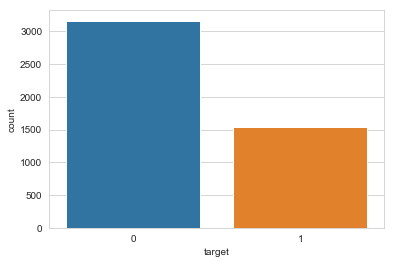

In [25]:
df['target'].value_counts()
sns.countplot(df['target'])
sns.set_style('whitegrid')

## Feature Engineering

#### Инструментальные переменные. Эконометрический подход, неформальное исполнение:

In [39]:
import statsmodels.api as sm

In [47]:
XIV = np.array(df.age)
yIV = np.array(df.term_credit_current)

In [56]:
XIV = sm.add_constant(XIV)

In [57]:
model = sm.OLS(yIV, XIV)

In [58]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.4012
Date:                Mon, 01 Apr 2019   Prob (F-statistic):              0.526
Time:                        04:02:27   Log-Likelihood:                -19759.
No. Observations:                4704   AIC:                         3.952e+04
Df Residuals:                    4702   BIC:                         3.954e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.3313      0.960     51.399      0.0

In [62]:
df["IV_term_credit_current"] = 49.3313 + (-0.1059*df.age)

In [63]:
df.head()

,customer_month_salary,sum_credit_current,term_credit_current,form,sphere,type,EDUCATION,age,marital_status,time_at_work,GENDER,month_passport_issued,month_with_bank,CITY,target,IV_term_credit_current
0,52350.25,500000,59,ООО,"Наука, Образование, Здравоохранение",вспомогательный персонал,высшее,44,холост / не замужем,68.0,мужской,124,67.0,Москва,1,44.6717
1,115000.00,400000,60,Иная форма,Другое,специалист,высшее,30,холост / не замужем,96.0,мужской,107,68.0,Москва,1,46.1543
2,87000.00,361000,60,ОАО,"Финансы, управляющие компании, банки, страхование",специалист,Высшее/Второе высшее/Ученая степень,28,женат / замужем,117.0,женский,2,72.0,Москва,1,46.3661
3,145358.17,1499000,60,ЗАО,"Финансы, управляющие компании, банки, страхование",менеджер среднего звена,Высшее/Второе высшее/Ученая степень,30,женат / замужем,35.0,мужской,124,70.0,Москва,1,46.1543
4,50000.00,365000,60,ООО,Другое,специалист,среднее-специальное,31,холост / не замужем,48.0,мужской,131,88.0,Москва,1,46.0484


In [74]:
XIV = np.array(df.age)
yIV = np.array(df.time_at_work)

In [75]:
XIV = sm.add_constant(XIV)

In [76]:
model = sm.OLS(yIV, XIV)

In [77]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.150
Method:                 Least Squares   F-statistic:                     829.4
Date:                Mon, 01 Apr 2019   Prob (F-statistic):          4.11e-168
Time:                        04:10:31   Log-Likelihood:                -25901.
No. Observations:                4704   AIC:                         5.181e+04
Df Residuals:                    4702   BIC:                         5.182e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -37.8091      3.542    -10.676      0.0

In [79]:
df["IV_time_at_work"] = -37.8091 + (2.6719 * df.age)

In [80]:
df.head()

,customer_month_salary,sum_credit_current,term_credit_current,form,sphere,type,EDUCATION,age,marital_status,time_at_work,GENDER,month_passport_issued,month_with_bank,CITY,target,IV_term_credit_current,IV_time_at_work
0,52350.25,500000,59,ООО,"Наука, Образование, Здравоохранение",вспомогательный персонал,высшее,44,холост / не замужем,68.0,мужской,124,67.0,Москва,1,44.6717,79.7545
1,115000.00,400000,60,Иная форма,Другое,специалист,высшее,30,холост / не замужем,96.0,мужской,107,68.0,Москва,1,46.1543,42.3479
2,87000.00,361000,60,ОАО,"Финансы, управляющие компании, банки, страхование",специалист,Высшее/Второе высшее/Ученая степень,28,женат / замужем,117.0,женский,2,72.0,Москва,1,46.3661,37.0041
3,145358.17,1499000,60,ЗАО,"Финансы, управляющие компании, банки, страхование",менеджер среднего звена,Высшее/Второе высшее/Ученая степень,30,женат / замужем,35.0,мужской,124,70.0,Москва,1,46.1543,42.3479
4,50000.00,365000,60,ООО,Другое,специалист,среднее-специальное,31,холост / не замужем,48.0,мужской,131,88.0,Москва,1,46.0484,45.0198


### Новые фичи

In [115]:
df['myFeature1'] = np.log(df.customer_month_salary + 0.0001)
df['myFeature2'] = (df.term_credit_current + df.month_with_bank) / df.term_credit_current
df['myFeature3'] = df.time_at_work / df.age
df['myFeature4'] = (12 * (df.sum_credit_current/df.term_credit_current)) / ((df.customer_month_salary + 0.0001) * 12)
df["myfeature5"] = df.term_credit_current / (df.time_at_work + 0.0001)

In [110]:
X.head()

,customer_month_salary,sum_credit_current,term_credit_current,age,time_at_work,month_passport_issued,month_with_bank,IV_term_credit_current,IV_time_at_work,myFeature1,...,CITY_Таганрог,CITY_Тольятти,CITY_Томск,CITY_Тула,CITY_Тюмень,CITY_Уфа,CITY_Челябинск,CITY_Череповец,CITY_Чита,CITY_Ярославль
0,52350.25,500000,59,44,68.0,124,67.0,44.6717,79.7545,10.865712,...,0,0,0,0,0,0,0,0,0,0
1,115000.00,400000,60,30,96.0,107,68.0,46.1543,42.3479,11.652687,...,0,0,0,0,0,0,0,0,0,0
2,87000.00,361000,60,28,117.0,2,72.0,46.3661,37.0041,11.373663,...,0,0,0,0,0,0,0,0,0,0
3,145358.17,1499000,60,30,35.0,124,70.0,46.1543,42.3479,11.886956,...,0,0,0,0,0,0,0,0,0,0
4,50000.00,365000,60,31,48.0,131,88.0,46.0484,45.0198,10.819778,...,0,0,0,0,0,0,0,0,0,0


In [116]:
new_with_dummies = pd.get_dummies(df, drop_first=True)

In [117]:
y = new_with_dummies["target"]
X = new_with_dummies.drop('target', axis = 1)

## Feature Selection

Построим графики важности признаков на основе случайного леса и градиентного бустинга

In [125]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


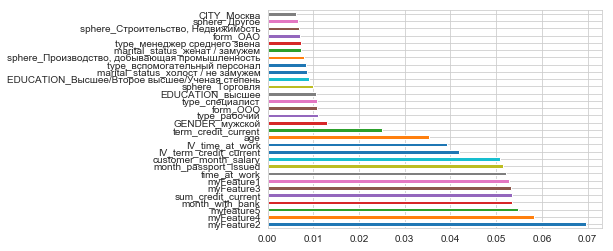

In [108]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

(pd.Series(model.feature_importances_, index=X.columns)
 .nlargest(30)
   .plot(kind='barh')) 

In [93]:
import lightgbm as lgb
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.metrics import roc_auc_score, roc_curve

In [151]:
features = [c for c in X.columns]
target = y_train

In [152]:
param = {
    'metric':'auc',
    'min_data_in_leaf': 1,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary'
}

In [157]:
folds = StratifiedKFold(n_splits=15, shuffle=False, random_state=44000)
oof = np.zeros(len(X_train))
predictions = np.zeros(len(X_test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(X_train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(X_train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 100000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=200, early_stopping_rounds = 80)
    oof[val_idx] = clf.predict(X_train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(X_test[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold 0
Training until validation scores don't improve for 80 rounds.
Early stopping, best iteration is:
[115]	training's auc: 0.998378	valid_1's auc: 0.742211
Fold 1
Training until validation scores don't improve for 80 rounds.
Early stopping, best iteration is:
[35]	training's auc: 0.950772	valid_1's auc: 0.714996
Fold 2
Training until validation scores don't improve for 80 rounds.
[200]	training's auc: 0.999985	valid_1's auc: 0.700263
Early stopping, best iteration is:
[254]	training's auc: 1	valid_1's auc: 0.714809
Fold 3
Training until validation scores don't improve for 80 rounds.
Early stopping, best iteration is:
[87]	training's auc: 0.994534	valid_1's auc: 0.710398
Fold 4
Training until validation scores don't improve for 80 rounds.
Early stopping, best iteration is:
[78]	training's auc: 0.994926	valid_1's auc: 0.693788
Fold 5
Training until validation scores don't improve for 80 rounds.
Early stopping, best iteration is:
[21]	training's auc: 0.905373	valid_1's auc: 0.686749
Fo

C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


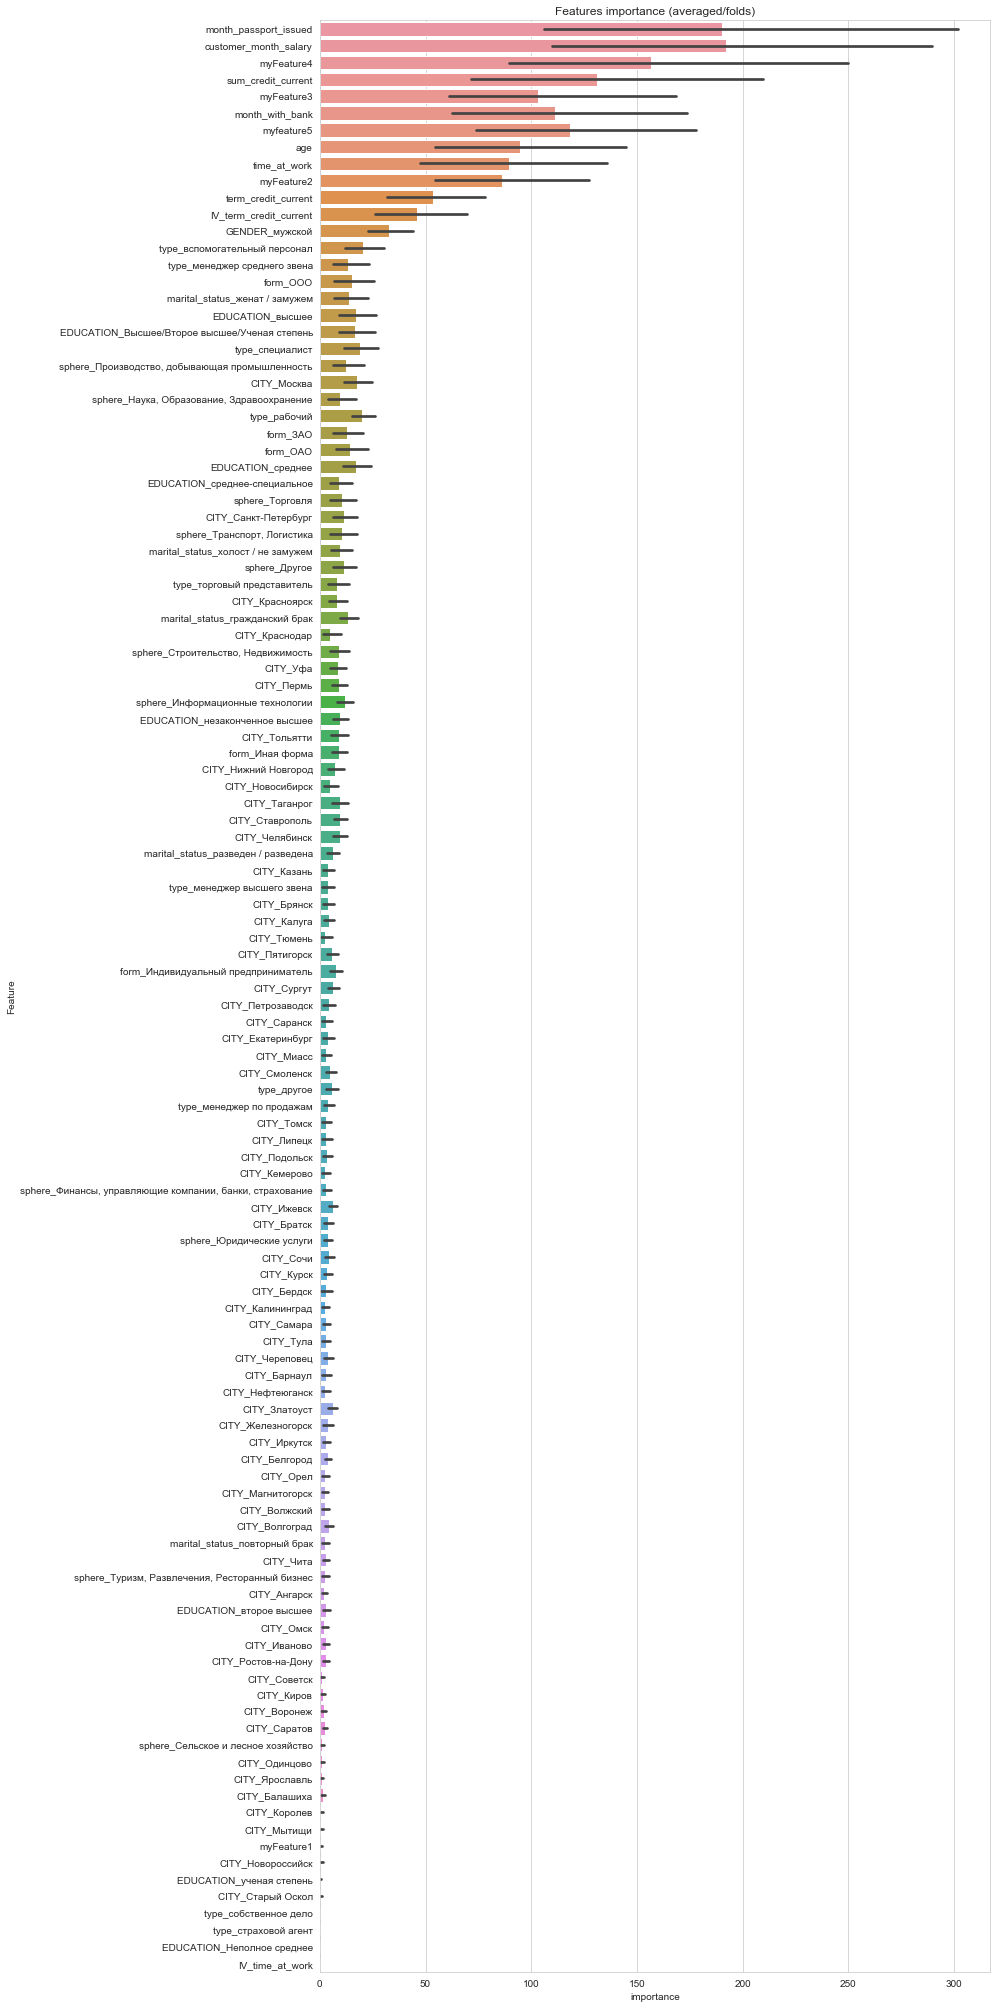

In [158]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
#plt.savefig('FI.png')

Странно, но каждый раз переменная month_passport_issued оказывается важной.

## Отбор признаков под Логит

In [101]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [107]:
model = LogisticRegression()
# create the RFE model and select 8 attributes
rfe = RFE(model, 3)
rfe = rfe.fit(X_train, y_train)
# summarize the selection of the attributes
print('Selected features: %s' % list(X.columns[rfe.support_]))

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklea

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklea

Selected features: ['CITY_Братск', 'CITY_Златоуст', 'CITY_Таганрог']


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklea

#### Ещё раз с помощью случайного леса, только на ранее отобранных признаках

In [124]:
Ximp = X[["month_passport_issued", "time_at_work", "myFeature1", "myFeature2",
          "myFeature3", "myFeature4", "myfeature5", "customer_month_salary", "month_with_bank", "age", "IV_term_credit_current",
          "IV_time_at_work", "CITY_Таганрог", "CITY_Братск", "CITY_Златоуст"]]

In [154]:
X_train, X_test, y_train, y_test = train_test_split(Ximp, y, train_size = 0.7, random_state = 0)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


C:\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


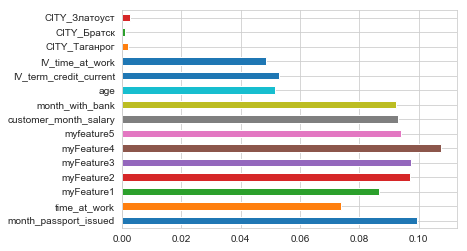

In [133]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

(pd.Series(model.feature_importances_, index=Ximp.columns)
   .plot(kind='barh')) 

In [134]:
Ximp.corr()

,month_passport_issued,time_at_work,myFeature1,myFeature2,myFeature3,myFeature4,myfeature5,customer_month_salary,month_with_bank,age,IV_term_credit_current,IV_time_at_work,CITY_Таганрог,CITY_Братск,CITY_Златоуст
month_passport_issued,1.000000,0.120158,0.109751,0.103553,0.121961,0.010258,-0.076586,0.106530,0.166306,0.120389,-0.120389,0.120389,-0.012472,-0.017002,0.022439
time_at_work,0.120158,1.000000,0.070613,0.142902,0.955617,-0.020441,-0.442291,0.057134,0.191398,0.387220,-0.387220,0.387220,0.026837,0.028069,0.022809
myFeature1,0.109751,0.070613,1.000000,0.167648,0.068781,-0.452125,-0.085936,0.520970,0.224637,0.105056,-0.105056,0.105056,-0.022496,-0.026948,-0.025872
myFeature2,0.103553,0.142902,0.167648,1.000000,0.123673,0.009189,-0.162945,0.219819,0.722503,0.165112,-0.165112,0.165112,-0.026397,-0.043619,-0.017942
myFeature3,0.121961,0.955617,0.068781,0.123673,1.000000,-0.022254,-0.486977,0.047015,0.170693,0.187632,-0.187632,0.187632,0.031376,0.042243,0.028444
myFeature4,0.010258,-0.020441,-0.452125,0.009189,-0.022254,1.000000,0.032487,-0.022879,0.014790,-0.015789,0.015789,-0.015789,-0.001453,-0.001818,-0.001584
myfeature5,-0.076586,-0.442291,-0.085936,-0.162945,-0.486977,0.032487,1.000000,-0.065328,-0.121439,-0.159083,0.159083,-0.159083,-0.010291,-0.023085,-0.002296
customer_month_salary,0.106530,0.057134,0.520970,0.219819,0.047015,-0.022879,-0.065328,1.000000,0.265322,0.109876,-0.109876,0.109876,-0.021967,-0.028565,-0.028747
month_with_bank,0.166306,0.191398,0.224637,0.722503,0.170693,0.014790,-0.121439,0.265322,1.000000,0.228292,-0.228292,0.228292,-0.031162,-0.061492,-0.020564
age,0.120389,0.387220,0.105056,0.165112,0.187632,-0.015789,-0.159083,0.109876,0.228292,1.000000,-1.000000,1.000000,0.013613,-0.005976,0.003184


In [138]:
features = [c for c in Ximp.columns]
target = y_train

In [139]:
folds = StratifiedKFold(n_splits=3, shuffle=False, random_state=44000)
oof = np.zeros(len(X_train))
predictions = np.zeros(len(X_test))
feature_importance_df = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(folds.split(X_train.values, target.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(X_train.iloc[trn_idx][features], label=target.iloc[trn_idx])
    val_data = lgb.Dataset(X_train.iloc[val_idx][features], label=target.iloc[val_idx])

    num_round = 100000
    clf = lgb.train(param, trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=200, early_stopping_rounds = 80)
    oof[val_idx] = clf.predict(X_train.iloc[val_idx][features], num_iteration=clf.best_iteration)
    
    fold_importance_df = pd.DataFrame()
    fold_importance_df["Feature"] = features
    fold_importance_df["importance"] = clf.feature_importance()
    fold_importance_df["fold"] = fold_ + 1
    feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
    
    predictions += clf.predict(X_test[features], num_iteration=clf.best_iteration) / folds.n_splits

print("CV score: {:<8.5f}".format(roc_auc_score(target, oof)))

Fold 0
Training until validation scores don't improve for 80 rounds.
Early stopping, best iteration is:
[26]	training's auc: 0.69932	valid_1's auc: 0.637506
Fold 1
Training until validation scores don't improve for 80 rounds.
Early stopping, best iteration is:
[19]	training's auc: 0.70145	valid_1's auc: 0.644493
Fold 2
Training until validation scores don't improve for 80 rounds.
Early stopping, best iteration is:
[119]	training's auc: 0.716105	valid_1's auc: 0.654454
CV score: 0.53930 


C:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


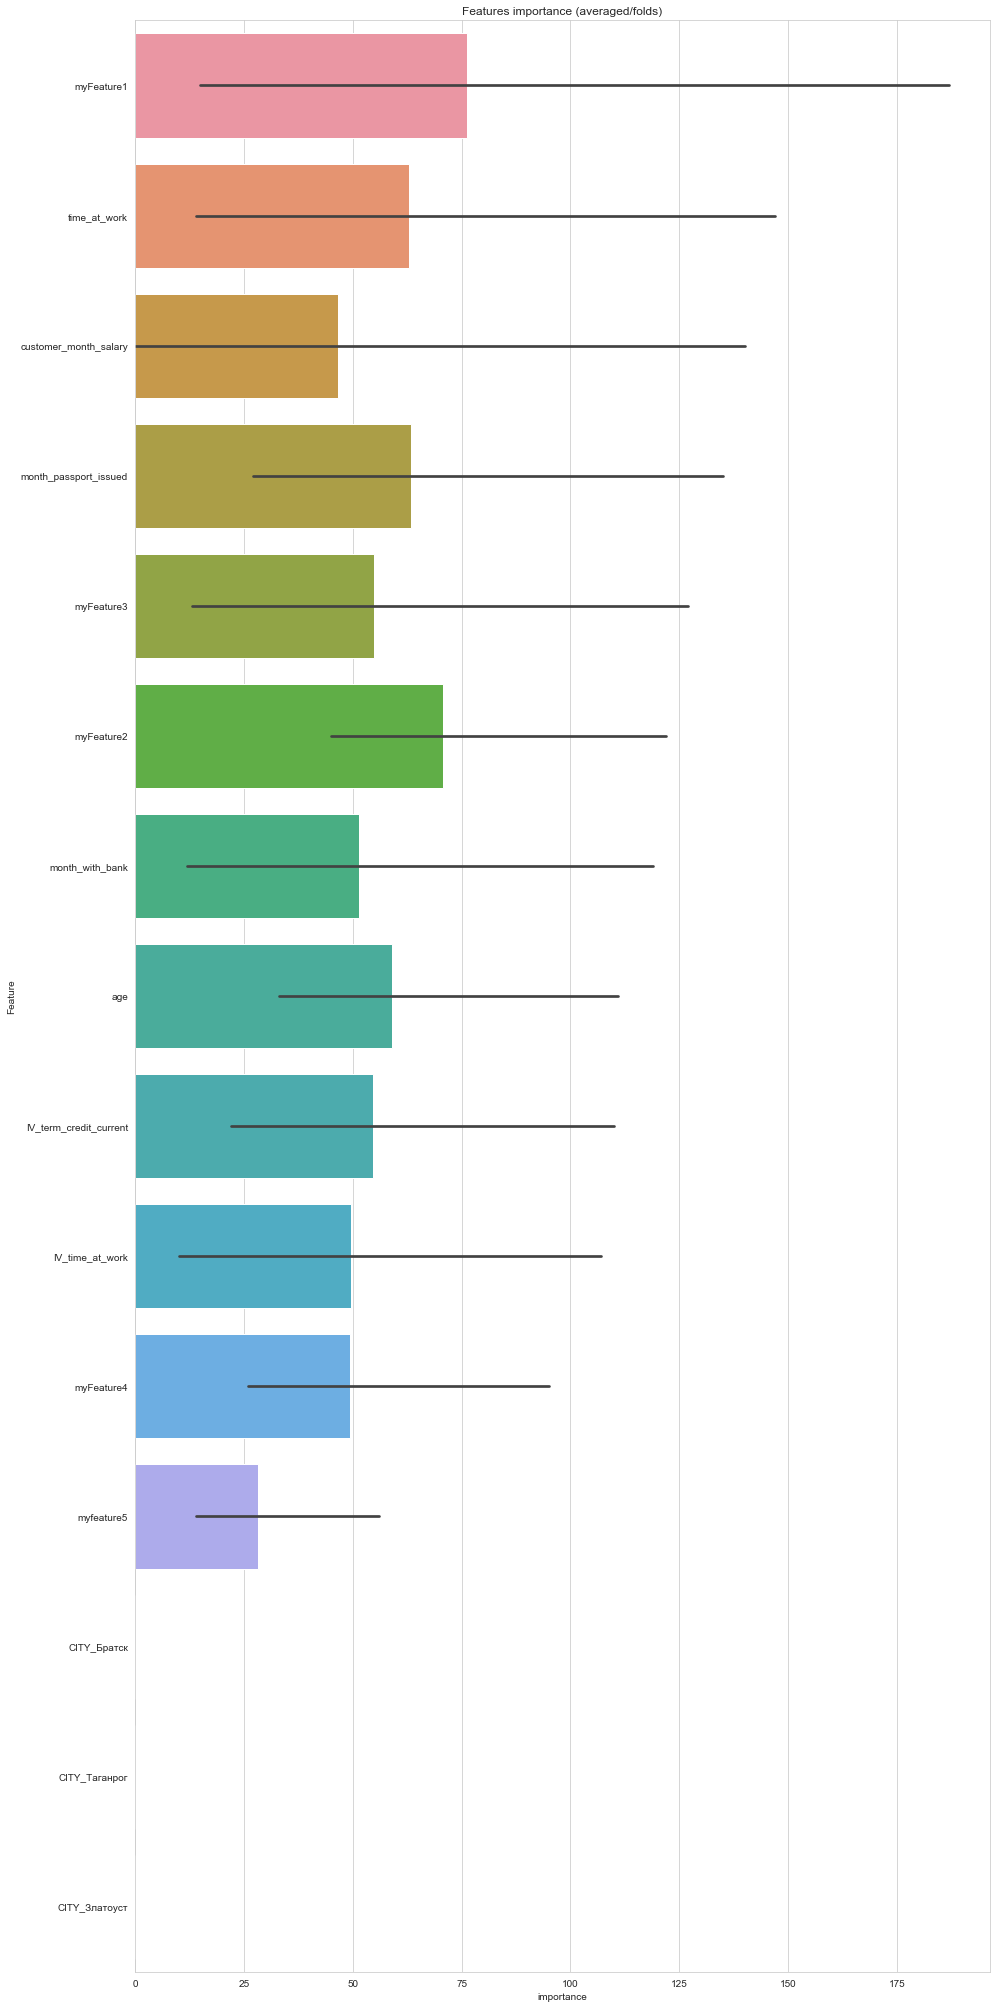

In [140]:
cols = (feature_importance_df[["Feature", "importance"]]
        .groupby("Feature")
        .mean()
        .sort_values(by="importance", ascending=False)[:150].index)
best_features = feature_importance_df.loc[feature_importance_df.Feature.isin(cols)]

plt.figure(figsize=(14,28))
sns.barplot(x="importance", y="Feature", data=best_features.sort_values(by="importance",ascending=False))
plt.title('Features importance (averaged/folds)')
plt.tight_layout()
#plt.savefig('FI.png')

### Финальная модель

In [159]:
Ximp = X[["month_passport_issued", "time_at_work", "myFeature1", "myFeature2",
          "myFeature3", "myFeature4", "myfeature5", "customer_month_salary", "month_with_bank", "age", "GENDER_мужской"]]

In [160]:
X_train, X_test, y_train, y_test = train_test_split(Ximp, y, train_size = 0.7, random_state = 0)

C:\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [161]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logit=LogisticRegression()
logit_cv=GridSearchCV(logit, grid, cv=10)
logit_cv.fit(X_train, y_train)

print("tuned hpyerparameters :(best parameters) ",logit_cv.best_params_)
print("accuracy :",logit_cv.best_score_)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklea

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklea

C:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\l

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'penalty': 'l1'}
accuracy : 0.6849939246658566


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [162]:
logitTuned = LogisticRegression(penalty= 'l1', C = 1.0)

In [163]:
logitTuned.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [164]:
y_pred = logitTuned.predict(X_test)

In [165]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [166]:
roc_auc_score(y_test, y_pred)

0.5410173013506798